### Mahyar Sadeghi 
### S5283082
### Project title: Noise reduction by basic/adaptive filtering 


### Introduction:
The goal of this project is to demonstrate the effect of different noise types using some filters and measure the effectiveness of the taken approaches. 
In real life we need more accurate ways of denoising methods since a signal can be corrupted with different amounts or types of noises. Here we will deal with two kinds of noises:
1. White noise- which is generated by random gaussian distribution
2. Babble noise- Which in nature is not a noise. Babble noise can be considered as a background noise which we are not interested in. One good example can be hearing the noise of childeren while we are talking to someone on the phone near a park.

In order to denoise these types of noises we will use Butterworth filter and Kalman filtering to demonstrate the performance based on the nature of the noise using a measurement called SNR

SNR is the signal to noise ratio which can be calculated using different formulas. Since in real life we don't have access to the pure noise that makes the signal corrupted, we will use some estimations which is not precise but makes an approximation of SNR using some assumptions.overall, the higher this ratio is the more quality the signal has. 
We will also use SER which is a short form of Signal Error Ratio which is the difference of the signal and the noise. We will assume we have the access to the noise so this calculation will be easier.


### 1. Add noise with SNR=10:
Here we will create a noisy signal of 10 snr, meaning that the signal to noise ratio is 10. Yet, we will also store the pure signal, noise itself, and noisy signal gained from two above .
How can we add noise with a specific amount of snr?
Since we have direct access to noise, and the noise-free signal, based on amount of SNR, we can use the following formula to create a noisy signal:
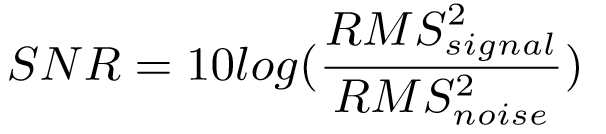

Simply, with solving the equation we can understand that the std of the noise equals to the RMS_noise. Using this std we can corrupt the signal with random gaussian noise. However for the babble noise we will repeat the same procedure. But in the end we will compute the unknown constant "a", then multipy the noise with it to obtain the noise with desired SNR using the formula below:
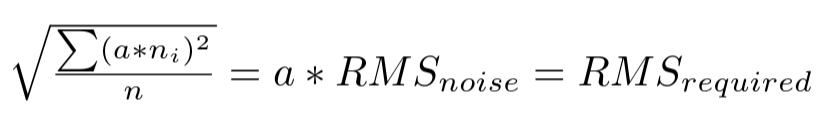


In [1]:
!pip  install librosa
import librosa
import IPython.display as ipd
from scipy.io.wavfile import read
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
import librosa.display
import math
import copy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.7/dist-packages/resampy/interpn.py:114: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  _resample_loop_p(x, t_out, interp_win, interp_delta, num_table, scale, y)


### Define the required functions to create the noise based on the SNR:

In [2]:
def get_white_noise(signal,SNR) :
    #RMS value of signal
    RMS_s=math.sqrt(np.mean(signal**2))
    #RMS values of noise
    RMS_n=math.sqrt(RMS_s**2/(pow(10,SNR/10)))
    STD_n=RMS_n
    noise=np.random.normal(0, STD_n, signal.shape[0])
    return noise

def create_babble_noise(signal,noise,SNR):
    RMS_s=math.sqrt(np.mean(signal**2))
    #required RMS of noise
    RMS_n=math.sqrt(RMS_s**2/(pow(10,SNR/10)))
    #current RMS of noise
    RMS_n_current=math.sqrt(np.mean(noise**2))
    noise=noise*(RMS_n/RMS_n_current)
    
    return noise


### Read the signals and plot them:
* x is the clean signal
*xb is the babble noise
*x0 is the corrupted signal with babble noise
*x0_wn corrupted signal with white noise

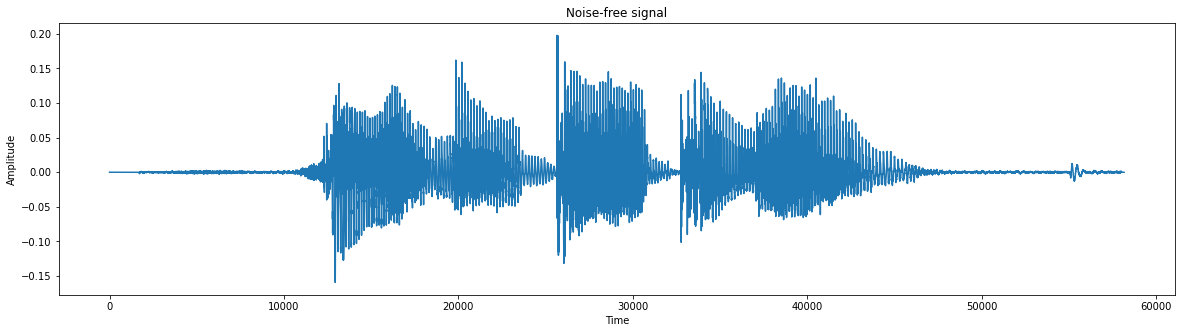

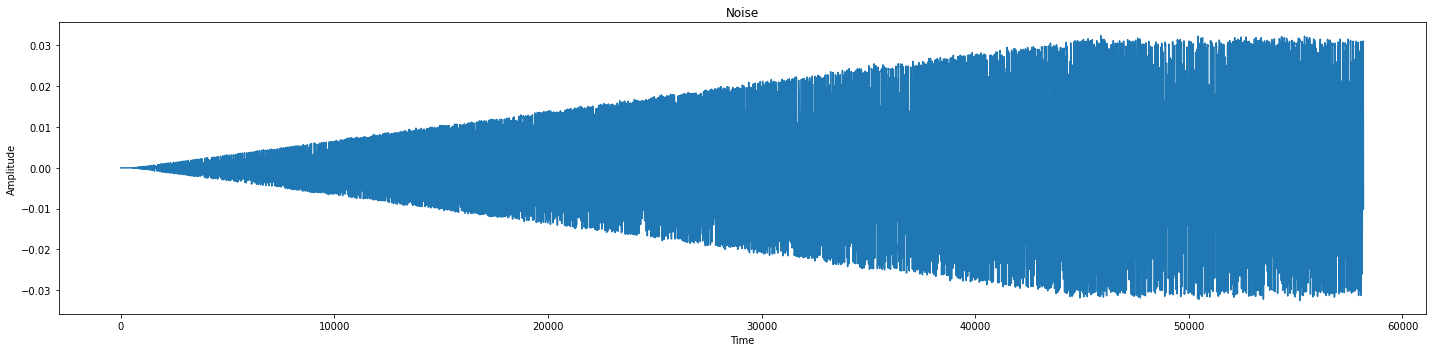

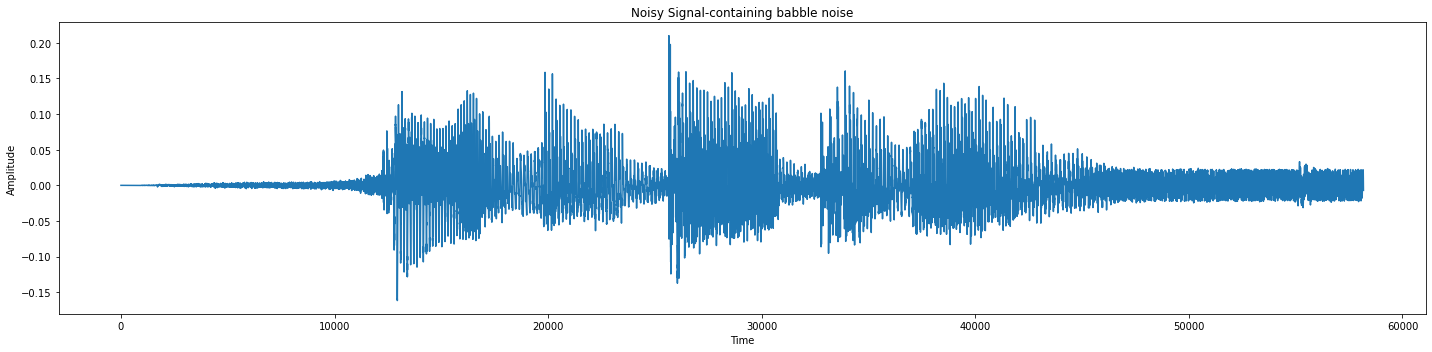

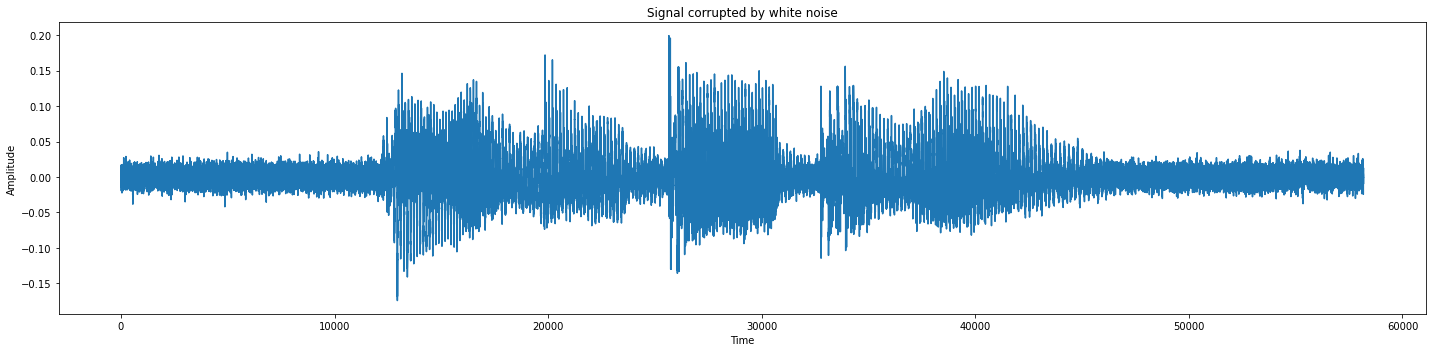

In [3]:


plt.figure(figsize=(20,5))
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
x, sampling_rate = librosa.load('signal.wav')
xb,sampling_rate_b=librosa.load('new_noise.wav')
plt.plot(x)
plt.title('Noise-free signal')
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.show()

plt.figure(figsize=(20,5))
plt.plot(xb)
plt.title('Noise')
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.show()

#Create the corrupted signal with babble noise:
if(len(xb)>len(x)):
    xb=xb[0:len(x)]


noise=create_babble_noise(x,xb,10)
x0=noise+x

plt.figure(figsize=(20,5))
plt.plot(x0)
plt.title('Noisy Signal-containing babble noise')
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.show()



#Create noisy signal corrupted with white noise with snr of 10.
#We will add white noise to x0 which is already corrupted by babble noise to make the future comparisons easier.
noise_gaussian=get_white_noise(x,SNR=10)
x0_wn=x+noise_gaussian

overall_noise=noise+noise_gaussian

plt.figure(figsize=(20,5))
plt.plot(x0_wn)
plt.title('Signal corrupted by white noise')
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.show()



### Play the signals:
Here we will play the signals to hear the results. One important thing here to mention is that if we increase the value of snr while we are creating the noisy signal, x0, the quality should also increase and we should see less noisy parts on the waveform.



In [4]:
# Clean audio
ipd.Audio(x, rate=sampling_rate)

In [5]:
# Babble noise
ipd.Audio(xb, rate=sampling_rate)

In [6]:
# Noisy signal corrupted by babble noise
ipd.Audio(x0, rate=sampling_rate)

In [7]:
# Noisy signla corrupted by white noise
ipd.Audio(x0_wn, rate=sampling_rate)

### Butterworth Filter:
The Butterworth filter is a type of signal processing filter designed to have a frequency response that is as flat as possible in the passband. Meaning that we will only allow the desired values to survive from the filter. The gain G(w)  of an nth-order Butterworth low-pass filter is given in terms of the transfer function H(s) as:

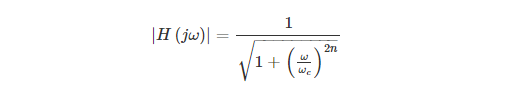

where:

H(jω) = transfer function at angular frequency ω
ω = angular frequency and is equal to 2πf
ωc = cutoff frequency expressed as an angular value and is equal to 2πfc

Below the effect of different ordeers are represented:

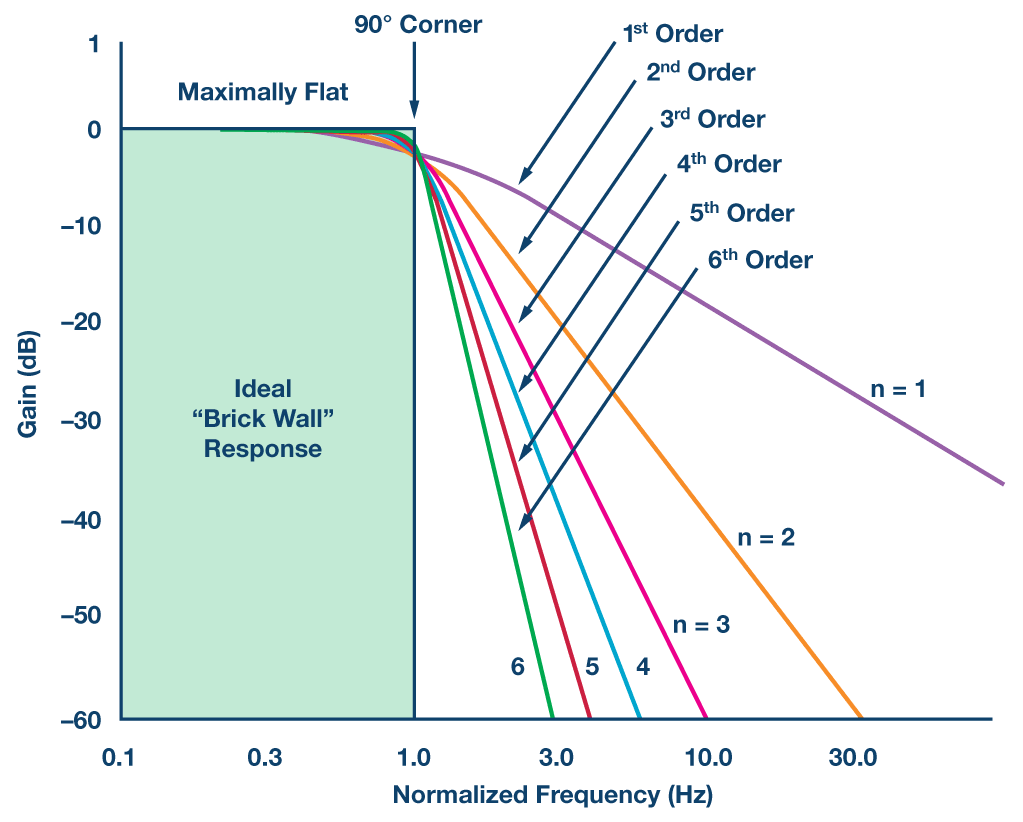

As we see in the figure above, as we increase the order, the result gets more close to the ideal case.

Here we will use order of 16 to denoise the corrupted signal with white noise.


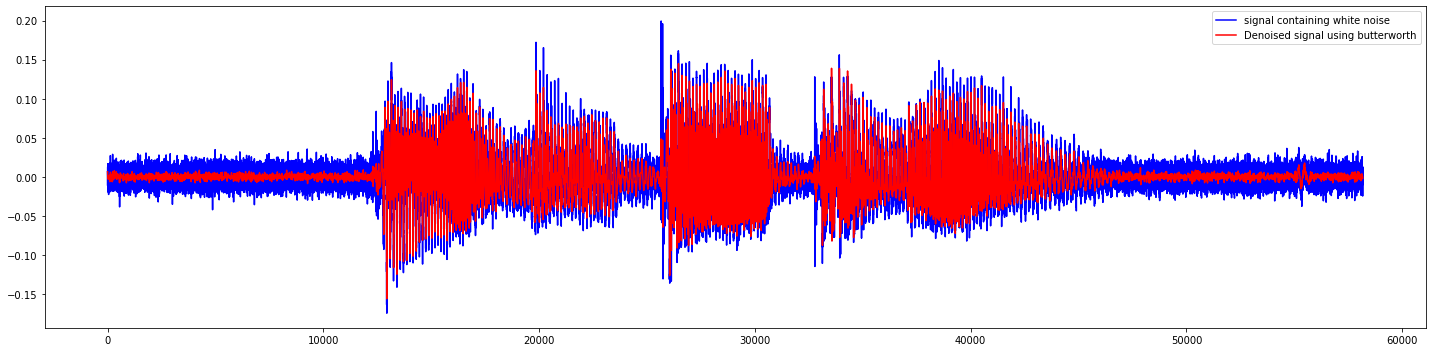

In [8]:
order=16
wn=1000
sos = signal.butter(order, wn, 'lp', fs=sampling_rate, output='sos')
filtered = signal.sosfiltfilt(sos, x0_wn)
plt.figure(figsize=(20,5))
plt.plot(x0_wn, color='b',label='signal containing white noise')
plt.plot(filtered,color='r',label='Denoised signal using butterworth')
plt.legend()
plt.show()


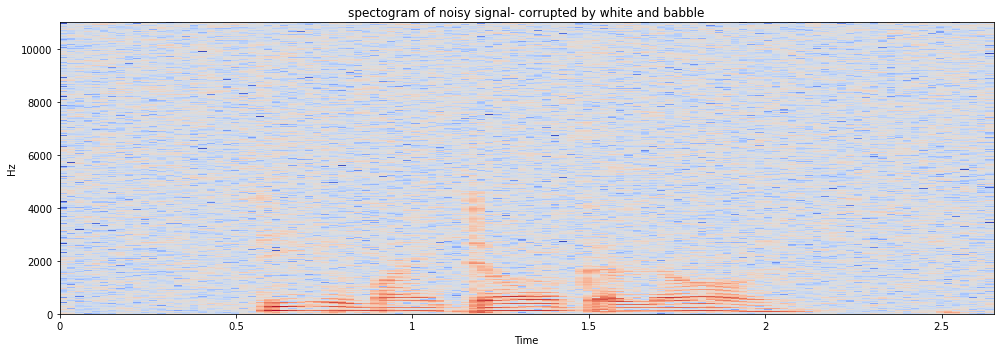

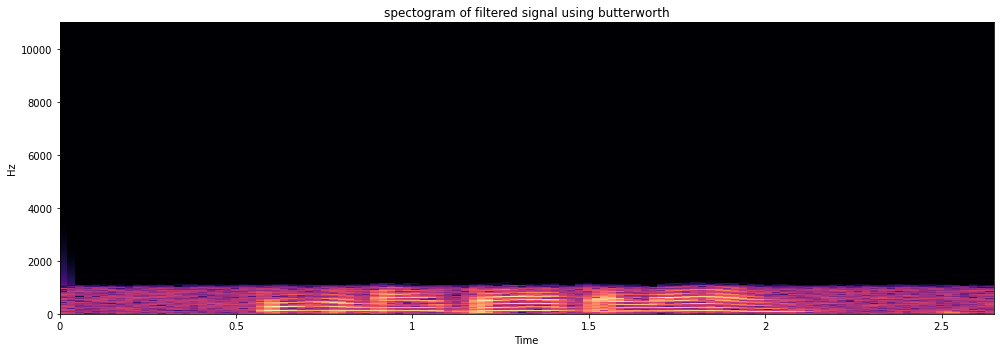

In [9]:

specgram = librosa.stft(x0_wn)
Xdb = librosa.amplitude_to_db(abs(specgram))
plt.figure(figsize=(14, 5))
plt.title('spectogram of noisy signal- corrupted by white and babble')
librosa.display.specshow(Xdb, sr=sampling_rate, x_axis='time', y_axis='hz')



specgram = librosa.stft(filtered)
Xdb = librosa.amplitude_to_db(abs(specgram))
plt.figure(figsize=(14, 5))
plt.title('spectogram of filtered signal using butterworth')
librosa.display.specshow(Xdb, sr=sampling_rate, x_axis='time', y_axis='hz')

The effect of choosing cutoff frequency can be more clear in the spectogram. If we increase the cutoff frequency, for each time we could see bigger values of frequency on the figure. 

### Compute SNR:
In order to have an estimation of SNR in a signal we will use WADA algorithm which uses some assumptions to measure the SNR value in a signal. 
The assumption here is that signal follows the gamma distribution. Based on the [paper](https://www.cs.cmu.edu/~robust/Papers/KimSternIS08.pdf) it can be seen that the gamma distribution how close is to the distribution of signal amplitude. The pipline to estimate it is as follow:

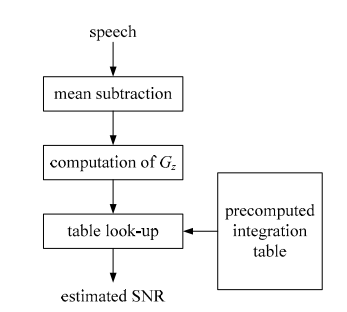



In [10]:
def wada_snr(wav):

    eps = 1e-10
    # next 2 lines define a fancy curve derived from a gamma distribution -- see paper
    db_vals = np.arange(-20, 101)
    g_vals = np.array([0.40974774, 0.40986926, 0.40998566, 0.40969089, 0.40986186, 0.40999006, 0.41027138, 0.41052627, 0.41101024, 0.41143264, 0.41231718, 0.41337272, 0.41526426, 0.4178192 , 0.42077252, 0.42452799, 0.42918886, 0.43510373, 0.44234195, 0.45161485, 0.46221153, 0.47491647, 0.48883809, 0.50509236, 0.52353709, 0.54372088, 0.56532427, 0.58847532, 0.61346212, 0.63954496, 0.66750818, 0.69583724, 0.72454762, 0.75414799, 0.78323148, 0.81240985, 0.84219775, 0.87166406, 0.90030504, 0.92880418, 0.95655449, 0.9835349 , 1.01047155, 1.0362095 , 1.06136425, 1.08579312, 1.1094819 , 1.13277995, 1.15472826, 1.17627308, 1.19703503, 1.21671694, 1.23535898, 1.25364313, 1.27103891, 1.28718029, 1.30302865, 1.31839527, 1.33294817, 1.34700935, 1.3605727 , 1.37345513, 1.38577122, 1.39733504, 1.40856397, 1.41959619, 1.42983624, 1.43958467, 1.44902176, 1.45804831, 1.46669568, 1.47486938, 1.48269965, 1.49034339, 1.49748214, 1.50435106, 1.51076426, 1.51698915, 1.5229097 , 1.528578  , 1.53389835, 1.5391211 , 1.5439065 , 1.54858517, 1.55310776, 1.55744391, 1.56164927, 1.56566348, 1.56938671, 1.57307767, 1.57654764, 1.57980083, 1.58304129, 1.58602496, 1.58880681, 1.59162477, 1.5941969 , 1.59693155, 1.599446  , 1.60185011, 1.60408668, 1.60627134, 1.60826199, 1.61004547, 1.61192472, 1.61369656, 1.61534074, 1.61688905, 1.61838916, 1.61985374, 1.62135878, 1.62268119, 1.62390423, 1.62513143, 1.62632463, 1.6274027 , 1.62842767, 1.62945532, 1.6303307 , 1.63128026, 1.63204102])

    # peak normalize, get magnitude, clip lower bound
    wav = np.array(wav)
    wav = wav / abs(wav).max()
    abs_wav = abs(wav)
    abs_wav[abs_wav < eps] = eps

    # calcuate statistics
    # E[|z|]
    v1 = max(eps, abs_wav.mean())
    # E[log|z|]
    v2 = np.log(abs_wav).mean()
    # log(E[|z|]) - E[log(|z|)]
    v3 = np.log(v1) - v2

    # table interpolation
    wav_snr_idx = None
    if any(g_vals < v3):
        wav_snr_idx = np.where(g_vals < v3)[0].max()
    # handle edge cases or interpolate
    if wav_snr_idx is None:
        wav_snr = db_vals[0]
    elif wav_snr_idx == len(db_vals) - 1:
        wav_snr = db_vals[-1]
    else:
        wav_snr = db_vals[wav_snr_idx] + \
            (v3-g_vals[wav_snr_idx]) / (g_vals[wav_snr_idx+1] - \
            g_vals[wav_snr_idx]) * (db_vals[wav_snr_idx+1] - db_vals[wav_snr_idx])

    # Calculate SNR
    dEng = sum(wav**2)
    dFactor = 10**(wav_snr / 10)
    dNoiseEng = dEng / (1 + dFactor) # Noise energy
    dSigEng = dEng * dFactor / (1 + dFactor) # Signal energy
    snr = 10 * np.log10(dSigEng / dNoiseEng)

    return snr

In [11]:
print('estimated snr for signal with white noise: ',wada_snr(x0_wn))
print('estimated snr for filtered signal using butterworth: ',wada_snr(filtered),'\n')


estimated snr for signal with white noise:  9.331912071705224
estimated snr for filtered signal using butterworth:  22.983174391627422 



In [12]:
## hearing the result:
#noisy signal
ipd.Audio(x0_wn, rate=sampling_rate)

In [13]:
#Filered signal
ipd.Audio(filtered, rate=sampling_rate)

#### Now lets apply butterworth on noisy signal corrupted by babble noise to see the perfomance:

As mentioned before, we are dealing with two different types of noise. Babble and White noise. We applied butterworth filtering on the signal corrupted by white noise and it could increase the SNR. 
 But the question is how to deal with babble noise? 
Is butterworth a good option?

We will see here by filtering the corrupted signal with babble noise and filtering in with butterworth and then compute the snr to see if it was useful or not.

In [14]:
order=50
wn=4500
sos_babble = signal.butter(order, wn, 'lp', fs=sampling_rate, output='sos')
filtered_babble = signal.sosfiltfilt(sos, x0)
print('Computed snr for filtering babble noise: ',wada_snr(filtered_babble))
print('Computed snr for signal with babble noise: ', wada_snr(x0))

Computed snr for filtering babble noise:  23.360420750728657
Computed snr for signal with babble noise:  24.30673467138444


### Why snr decreased after filtering?
The nature of the babble noise is the reason for bad performance of filter. As we know babble noise is not noise since the sound has meaning to us. The better explanation is that it's undesired background voices that we are not interested in them. One way to deal with such a noise is using kalman filtering. Here we are not going to explain the deatails of the kalman itself. But we will use intuitions to show how it can denoise a signal.

### Kalman Implenetation:


In [15]:
class KalmanFilter(object):
    def __init__(self, F = None, B = None, H = None, Q = None, R = None, P = None, x0 = None):
      
        self.n = F.shape[1]
        self.m = H.shape[1]

        self.F = F
        self.H = H
        self.B = 0 if B is None else B
        self.Q = np.eye(self.n) if Q is None else Q
        self.R = np.eye(self.n) if R is None else R
        self.P = np.eye(self.n) if P is None else P
        self.x = np.zeros((self.n, 1)) if x0 is None else x0

    def predict(self, u = 0):
        self.x = np.dot(self.F, self.x) + np.dot(self.B, u)
        self.P = np.dot(np.dot(self.F, self.P), self.F.T) + self.Q
        return self.x

    def update(self, z):
        y = z - np.dot(self.H, self.x)
        S = self.R + np.dot(self.H, np.dot(self.P, self.H.T))
        K = np.dot(np.dot(self.P, self.H.T), np.linalg.inv(S))
        self.x = self.x + np.dot(K, y)
        I = np.eye(self.n)
        self.P = np.dot(np.dot(I - np.dot(K, self.H), self.P), 
        	(I - np.dot(K, self.H)).T) + np.dot(np.dot(K, self.R), K.T)

### Apply kalman on the noisy audio:
Kalman is an adaptive filter which uses meausurements to estimate the new value.
Consider the signal corrupted by babble noise:
X0=x+xb
X0 can be considered as our measurements. The true values for the denoised signal should be x, but since we don't have access to this signal, we will use kalman filtering. 
Kalman takes advantage of uncertainty and averaging. This can be demonstrated by figure below:
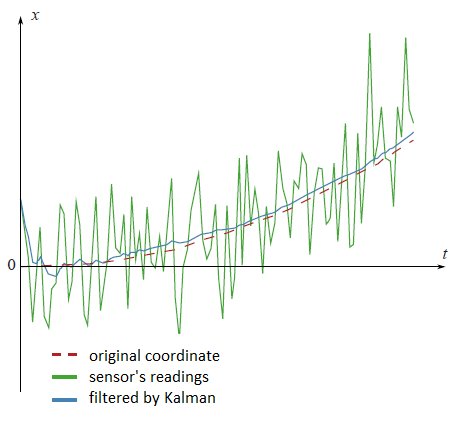


Let's assume that we got a sensor like a microphone to record the audio of someone's speech in a crowded park-(The park noise can be considered here as babble noise).
The red lines can be considered as the true values of the signal-The person's speech or clean signal(x).
As it is clear the collected data is noisy with fluctuations. Kalman uses these fluctuations and averages them to obtain the new signal which is really close to the actual values, or ideal clean signal.

In [16]:
F = np.array([[1]])
H = np.array([[0.5]])
Q = np.array([100])
R = np.array([100000])

predictions=[]
kf = KalmanFilter(F = F, H = H, Q = Q, R = R)
for z in x0:
  predictions.append(np.dot(H,  kf.predict())[0])
  kf.update(z)
predictions=np.array(predictions).reshape(len(predictions),)


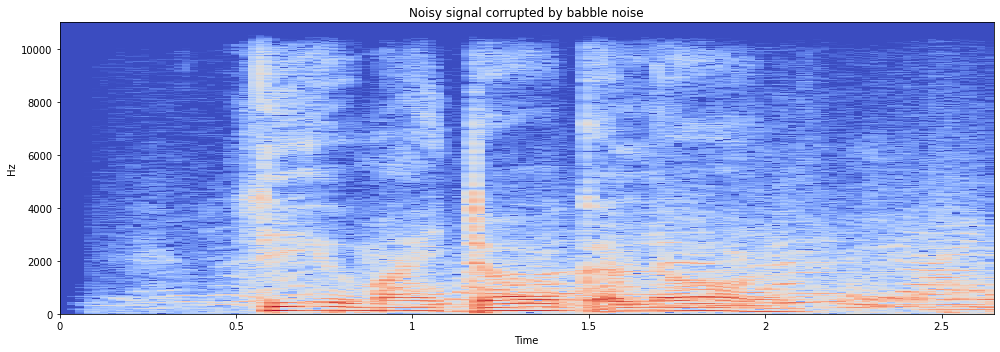

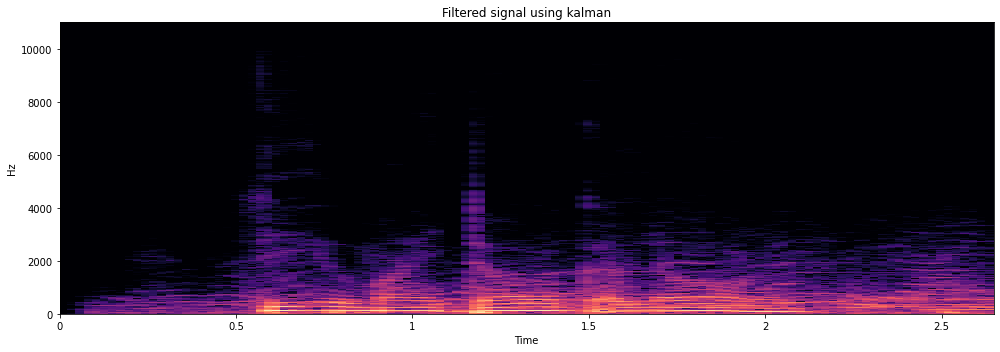

In [17]:
specgram = librosa.stft(x0)
Xdb = librosa.amplitude_to_db(abs(specgram))
plt.figure(figsize=(14, 5))
plt.title('Noisy signal corrupted by babble noise')
librosa.display.specshow(Xdb, sr=sampling_rate, x_axis='time', y_axis='hz')


specgram = librosa.stft(predictions.reshape(x0.shape[0],))
Xdb = librosa.amplitude_to_db(abs(specgram))
plt.figure(figsize=(14, 5))
plt.title('Filtered signal using kalman')
librosa.display.specshow(Xdb, sr=sampling_rate, x_axis='time', y_axis='hz')


Let's compare the results by hearing them:

In [18]:
# Filtered signal
ipd.Audio(predictions, rate=sampling_rate)

In [19]:
# Noisy signal corrupted by babble noise
ipd.Audio(x0, rate=sampling_rate)

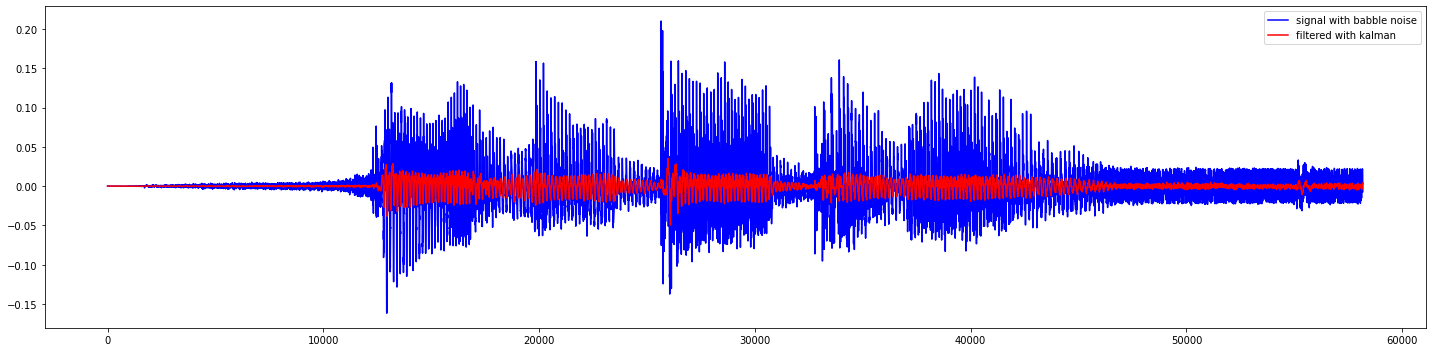

In [20]:
plt.figure(figsize=(20,5))
plt.plot(x0,color='b',label='signal with babble noise')

plt.plot(predictions,color='r',label='filtered with kalman')

plt.legend()
plt.show()

In [21]:
#Here we see an increase in the snr value:
print("SNR for noisy siganl: ",wada_snr(x0))
print("SNR for denoised signal using kalman: ",wada_snr(predictions))

SNR for noisy siganl:  24.30673467138444
SNR for denoised signal using kalman:  30.21108878199793


### Conclusions:
The project was devided into two parts of dealing with white and babble noise which are different in their nature. Using Butterworth filter we showed that it can be a good option to denoise signlas corrupted by white noise. SNR is signal to noise ratio which shows the quality of a signal. The more it is the better the quality and less the noise is. We used Wada algorithm to estimate it which uses some assumptions to estimate the snr. 
But the question was "Is butterworth filter a good option to denoise babble noise?" The answer was no, since it failed increasing the SNR of the signal. Instead we used kalman filtering which in it's essence it deals with noise. Since our measurements(x0 which contains babble noise) is noisy, we can use them to obtain a denoised signal with averaging which is done in kalman.
The kalman is not the only option. For example we could use wiener filter.

As this project demonstrated, kalman filtering is good option to deal with babble noise since it could increase the SNR value.